<a href="https://colab.research.google.com/github/meghnadh7/test/blob/major/major_project_genre_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [ ]:
tracks = pd.read_csv('spotify dataset.csv')
tracks.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6.0,-2.634,1.0,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11.0,-4.969,1.0,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1.0,-3.432,0.0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7.0,-3.778,1.0,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1.0,-4.672,1.0,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0


In [ ]:
tracks.shape

(26025, 23)

In [ ]:
# checking null values
tracks.isnull().sum()

track_id                    0
track_name                  3
track_artist                3
track_popularity            0
track_album_id              0
track_album_name            3
track_album_release_date    0
playlist_name               0
playlist_id                 1
playlist_genre              1
playlist_subgenre           1
danceability                1
energy                      1
key                         1
loudness                    1
mode                        1
speechiness                 1
acousticness                1
instrumentalness            1
liveness                    1
valence                     1
tempo                       1
duration_ms                 1
dtype: int64

In [ ]:
tracks.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6.0,-2.634,1.0,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11.0,-4.969,1.0,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1.0,-3.432,0.0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7.0,-3.778,1.0,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1.0,-4.672,1.0,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0


In [ ]:
# all null values are deleted now(checking)
tracks.dropna(inplace = True)

In [ ]:
tracks = tracks.drop(['track_id','track_album_id','playlist_id'], axis = 1)

In [ ]:
tracks.head()

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,pop,dance pop,0.748,0.916,6.0,-2.634,1.0,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,pop,dance pop,0.726,0.815,11.0,-4.969,1.0,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600.0
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,pop,dance pop,0.675,0.931,1.0,-3.432,0.0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,2019-07-19,Pop Remix,pop,dance pop,0.718,0.930,7.0,-3.778,1.0,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,pop,dance pop,0.650,0.833,1.0,-4.672,1.0,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0


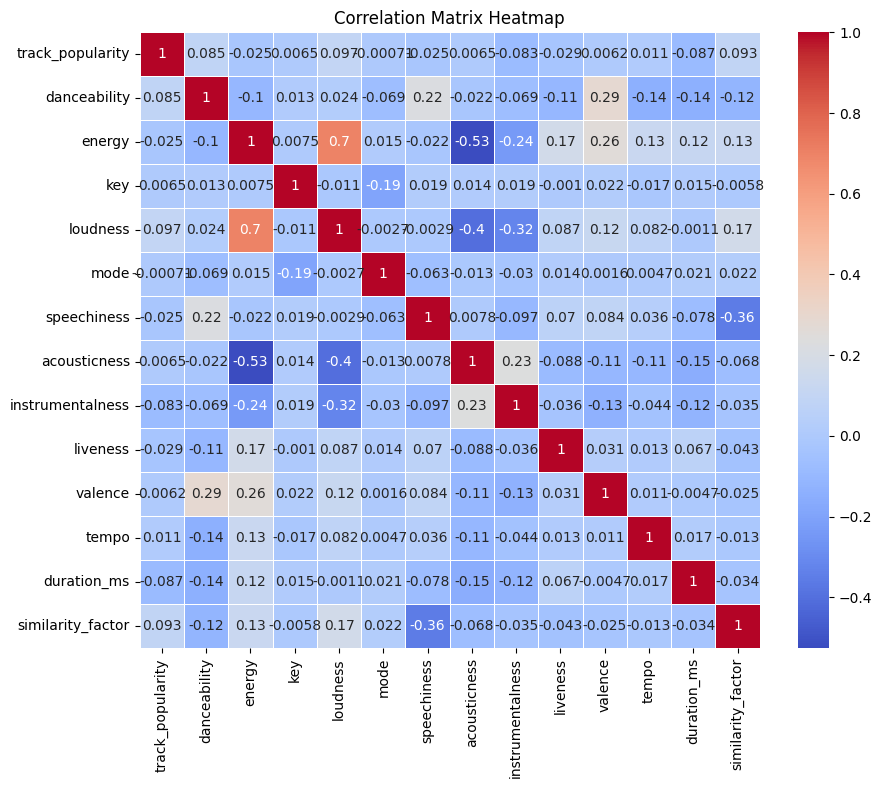

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = tracks.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


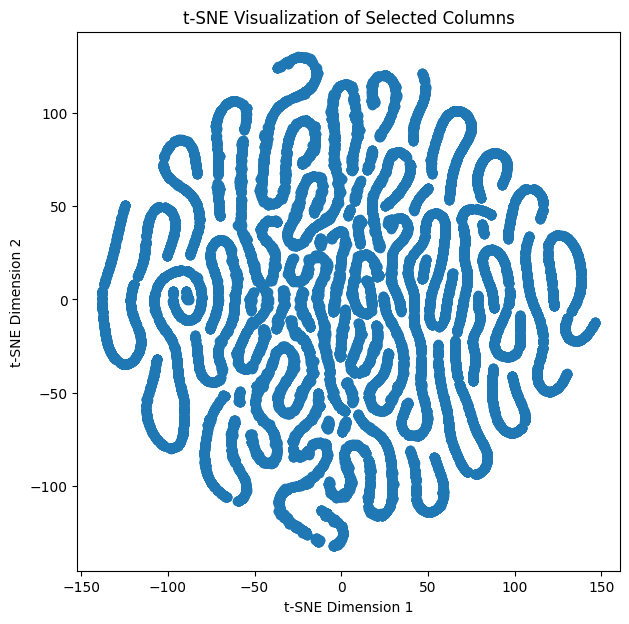

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load your "tracks" DataFrame or replace this with your data loading code
# For example, if you have a CSV file, you can use pd.read_csv('your_data.csv')
# Make sure your DataFrame contains only numeric columns or that you select the appropriate columns.

# Assuming your "tracks" DataFrame is loaded properly
tracks = pd.read_csv('spotify dataset.csv')  # Replace 'your_data.csv' with the actual file path or data loading code

# Specify the columns you want to use for t-SNE
columns_to_use = ['danceability', 'energy', 'key' ,'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']  # Replace with the actual column names

# Extract the subset of columns you want to include
subset_df = tracks[columns_to_use]

# Create a t-SNE model with 2 components and set the random seed
model = TSNE(n_components=2, random_state=0)

# Fit and transform the t-SNE model on the subset of columns
tsne_data = model.fit_transform(subset_df)

# Create a scatter plot to visualize the t-SNE representation
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.title("t-SNE Visualization of Selected Columns")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


In [ ]:
tracks['track_name'].nunique(), tracks.shape


(10928, (13171, 20))

In [ ]:
tracks = tracks.sort_values(by=['track_popularity'], ascending=False)
tracks.drop_duplicates(subset=['track_name'], keep='first', inplace=True)


In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'df' with a date column 'date_column'
# First, make sure that the date column is in a datetime format
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'])

# Extract the year from the date column
df['year'] = df['track_album_release_date'].dt.year

# Now, the 'year' column contains only the year values as integers

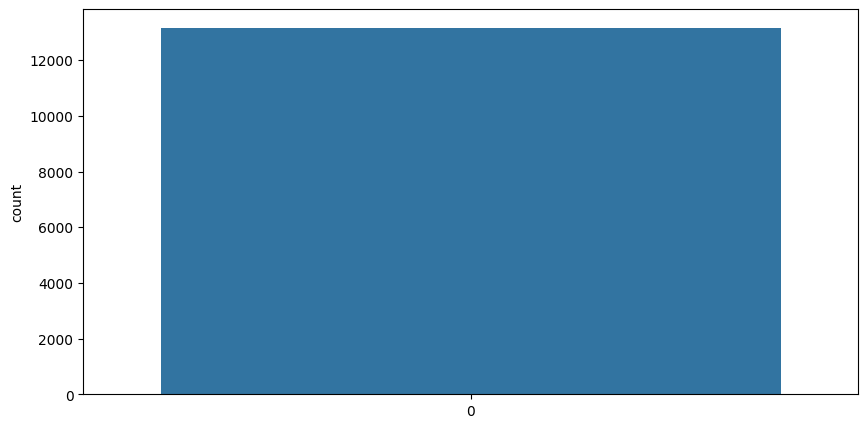

In [ ]:
import pandas as pd





plt.figure(figsize = (10, 5))
sb.countplot(df['year'])
plt.axis('on')
plt.show()


In [ ]:
floats = []
for col in tracks.columns:
  if tracks[col].dtype == 'float':
    floats.append(col)

len(floats)


12

ValueError: ignored

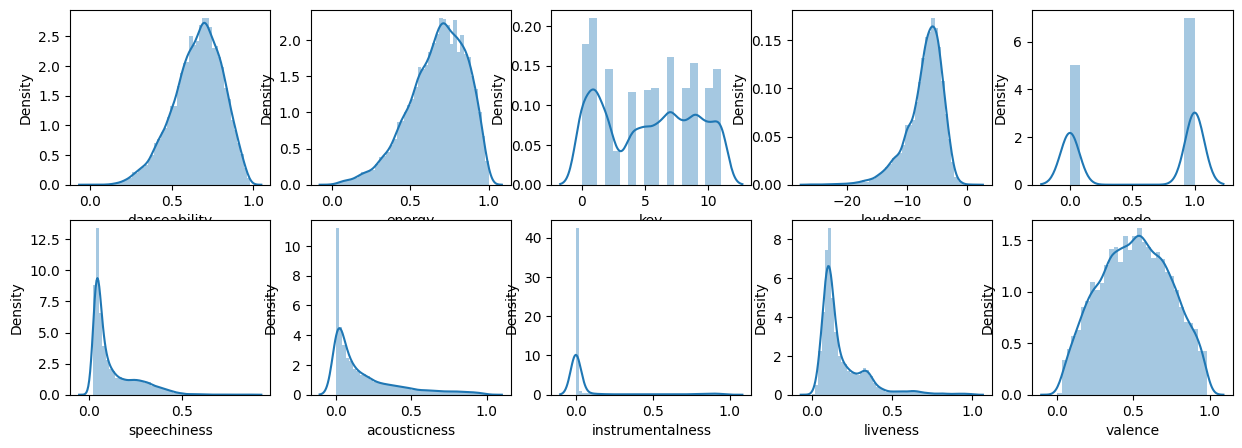

In [ ]:
plt.subplots(figsize = (15, 5))
for i, col in enumerate(floats):
  plt.subplot(2, 5, i + 1)
  sb.distplot(tracks[col])
plt.tight_layout()
plt.show()


In [ ]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(tracks['playlist_genre'])

In [ ]:
tracks = tracks.sort_values(by=['track_popularity'], ascending=False).head(10000)


In [ ]:
def get_similarities(song_name, data):
    # Getting vector for the input song.
    text_array1 = song_vectorizer.transform(data[data['track_name'] == song_name]['playlist_genre']).toarray()
    num_array1 = data[data['track_name'] == song_name].select_dtypes(include=np.number).to_numpy()

    # We will store similarity for each row of the dataset.
    sim = []
    for idx, row in data.iterrows():
        name = row['track_name']

        # Getting vector for the current song.
        text_array2 = song_vectorizer.transform(data[data['track_name'] == name]['playlist_genre']).toarray()
        num_array2 = data[data['track_name'] == name].select_dtypes(include=np.number).to_numpy()

        # Calculating similarities for text as well as numeric features
        text_sim = cosine_similarity(text_array1, text_array2)[0][0]
        num_sim = cosine_similarity(num_array1, num_array2)[0][0]
        sim.append(text_sim + num_sim)

    return sim



In [ ]:
def recommend_songs(song_name, data=tracks):
  # Base case
  if tracks[tracks['track_name'] == song_name].shape[0] == 0:
    print('This song is either not so popular or you\
    have entered invalid_name.\n Some songs you may like:\n')

    for song in data.sample(n=5)['name'].values:
      print(song)
    return

  data['similarity_factor'] = get_similarities(song_name, data)

  data.sort_values(by=['similarity_factor', 'popularity'],
                   ascending = [False, False],
                   inplace=True)

  # First song will be the input song itself as the similarity will be highest.
  display(data[['track_name', 'artists']][2:7])

In [ ]:
def recommend_songs(song_name, data=tracks):
    # Replace 'track_name' with the actual column name that contains song names
    song_name_column = 'track_name'

    # Base case
    if data[data[song_name_column] == song_name].shape[0] == 0:
        print("This song is either not so popular or you have entered an invalid name.")
        print("Some songs you may like:")

        for song in data.sample(n=5)[song_name_column].values:
            print(song)
        return

    # Calculate similarity scores
    data['similarity_factor'] = get_similarities(song_name, data)

    # Sort the data by similarity_factor and popularity
    data.sort_values(by=['similarity_factor', 'track_popularity'],
                     ascending=[False, False],
                     inplace=True)

    # Display recommended songs (excluding the input song)
    recommended_songs = data[data[song_name_column] != song_name][['track_name', 'track_artist']].head(5)
    display(recommended_songs)


,track_name,track_artist
377,Turning Up,ARASHI
227,Not Ok - Frank Walker Remix,Kygo
2169,Grace Kelly,MIKA
2366,Your Love Is My Drug,Kesha
23,Slow Dance (feat. Ava Max) - Sam Feldt Remix,AJ Mitchell


In [ ]:
recommend_songs('The Long Run', data=tracks)

,track_name,track_artist
3513,Periculär (Richtfest II),[:SITD:]
3541,Dein Anblick,Schandmaul
3191,Get The Balance Right! - Combination Mix,Depeche Mode
837,Not over Yet - Perfecto Edit,Grace
3832,Say It (feat. Tove Lo),Flume
